# Extract Sv from ANMPA data
This notebook will be used to calculate the mean backscatter value for the 2012, 2013 and 2014 data from the surveys in the ANMPA area. This notebook uses the function developed in 2013-2014ANMPA

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, date, time
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from mpl_toolkits.basemap import Basemap
%matplotlib inline

## Evaluation zone
The area that will be assesed for mean backscatter is determine by the stations used in all the survey years. 

In [2]:
min_lat = 69.39130000000
max_lat = 70.44650000000

min_long = -125.85600000000
max_long = -123.19400000000

## Load datasets

In [47]:
#aa)2012
values_2012 = pd.read_csv('../data/AmundsenGulf/2012/6 au 21 aout (biomasse).csv', header=0, usecols=[6,10,32,33,24,25])
values_2012 = values_2012.append(pd.read_csv('../data/AmundsenGulf/2012/22 aout au 3 sept (biomasse).csv', header=0, usecols=[6,10,32,33, 24,25]))
data12 = values_2012.values  


#a)2013
values_2013 = pd.read_csv('../data/AmundsenGulf/Biomass_2013/02-08-13 (biomasse).csv', header=0, usecols=[6,10,32,33,24,25])
days_2013 = {'03','04','05','06','07','08'}
for date in days_2013:
    fname = '../data/AmundsenGulf/Biomass_2013/%s-08-13 (biomasse).csv' %date
    # Columns are SV-mean, depth, Lat, long.
    values_2013 = values_2013.append(pd.read_csv(fname, header=0, usecols=[6,10,32,33,24,25]))
data13 = values_2013.values  



#b)2014
values_2014 = pd.read_csv('../data/AmundsenGulf/Biomass_2014/17-08-14 (biomasse).csv', header=0, usecols=[6,10,32,33,24,25])
values_2014 = values_2014.append(pd.read_csv('../data/AmundsenGulf/Biomass_2014/17-08-14 (biomasse) 2.csv', header=0, usecols=[6,10,32,33,24,25]))
days_2014 = {'22-08','23-08','24-08','25-08','26-08','27-08'}
for date in days_2014:
    fname = '../data/AmundsenGulf/Biomass_2014/%s-14 (biomasse).csv' %date
    # Columns are SV-mean, depth, Lat, long.
    values_2014 = values_2014.append(pd.read_csv(fname, header=0, usecols=[6,10,32,33,24,25]))
    fname2 = '../data/AmundsenGulf/Biomass_2014/%s-14 (biomasse) 2.csv' %date
    # Columns are SV-mean, depth, Lat, long.
    values_2014 = values_2014.append(pd.read_csv(fname2, header=0, usecols=[6,10,32,33, 24,25]))
data14 = values_2014.values 
print(len(data14))

330447


In [51]:
values_2014 = pd.read_csv('../data/AmundsenGulf/Biomass_2014/17-08-14 (biomasse).csv', header=0, usecols=[6,10,32,33,24,25])
values_2014 = values_2014.append(pd.read_csv('../data/AmundsenGulf/Biomass_2014/17-08-14 (biomasse) 2.csv', header=0, usecols=[6,10,32,33,24,25]))
print(dt_2013)

[datetime.datetime(2014, 8, 17, 0, 27, 35, 760000)
 datetime.datetime(2014, 8, 17, 0, 27, 35, 760000)
 datetime.datetime(2014, 8, 17, 0, 27, 35, 760000) ...
 datetime.datetime(2014, 8, 17, 17, 39, 2, 820000)
 datetime.datetime(2014, 8, 17, 17, 39, 2, 820000)
 datetime.datetime(2014, 8, 17, 17, 39, 2, 820000)]


## Create functions to process data

In [29]:
depth_thres = 100
Sv_thres = -900 # error threshold is -999

In [58]:
def ANMPAselectSv(data, max_lat, min_lat, max_long, min_long, depth_thres, Sv_thres):
    
    # Select data between 0-depth thres
    data_depthlim = data[data[:,1]<depth_thres,:]
    
    # Select data within lat and long
    index_within = np.where((data_depthlim[:,4]>min_lat)*(data_depthlim[:,4]<max_lat)*(data_depthlim[:,5]>min_long)*(data_depthlim[:,5]<max_long))
    data_within = data_depthlim[index_within[0],:]
    
    # Remove abnormal Sv
    data_trimmed = data_within[data_within[:,0]>Sv_thres,:]
    
    # Combine date and time for datetime object.
    dt = np.empty([len(data_trimmed),], dtype=object)
    for tim in np.arange(0,len(data_trimmed)):
        dstr = np.str(data_trimmed[tim,2])
        tstr = np.str(data_trimmed[tim,3])
        dt[tim] = datetime.strptime('%s%s'%(dstr,tstr), "%Y%m%d %H:%M:%S.%f")
    
    
    Sv = data_trimmed[:,0]
    dep = data_trimmed[:,1]
    lats = data_trimmed[:,4]
    longs = data_trimmed[:,5]

    return Sv, lats, longs, dt, dep

In [60]:
#Sv_2012, lats_2012, longs_2012, dt_2012 = ANMPAselectSv(data12, max_lat, min_lat, max_long, min_long, depth_thres, Sv_thres)
Sv_2013, lats_2013, longs_2013, dt_2013, dep_2013 = ANMPAselectSv(data13, max_lat, min_lat, max_long, min_long, depth_thres, Sv_thres)
Sv_2014, lats_2014, longs_2014, dt_2014, dep_2014 = ANMPAselectSv(data14, max_lat, min_lat, max_long, min_long, depth_thres, Sv_thres)

In [61]:
N = 1000
run_mean13 = np.convolve(Sv_2013, np.ones((N,))/N, mode='valid')
run_mean14 = np.convolve(Sv_2014, np.ones((N,))/N, mode='valid')

No handles with labels found to put in legend.
No handles with labels found to put in legend.


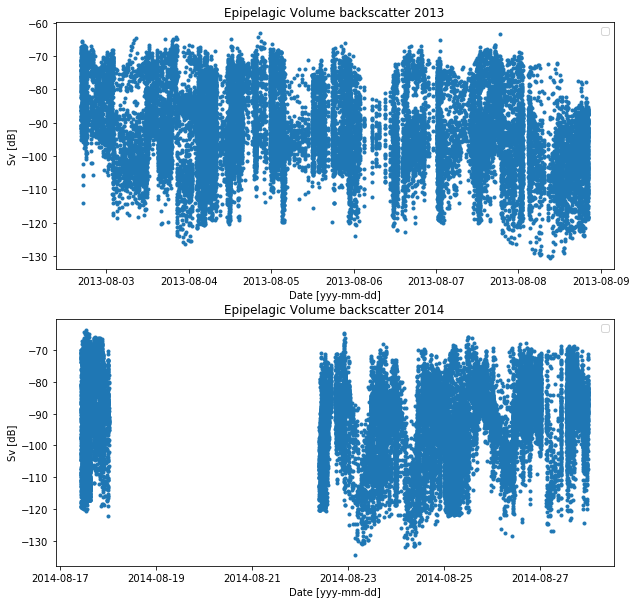

In [57]:
plt.figure(figsize=(10,10))
ax1 = plt.subplot(211)
ax1.plot(dt_2013, Sv_2013, '.')
#ax1.plot(np.arange(N/2-1,len(Sv_2013)-N/2), run_mean13, color='black', label='Running Mean')
ax1.set_title('Epipelagic Volume backscatter 2013')
ax1.set_ylabel('Sv [dB]')
ax1.set_xlabel('Date [yyy-mm-dd]')

ax2 = plt.subplot(212)
ax2.plot(dt_2014, Sv_2014, '.')
#ax2.plot(np.arange(N/2-1,len(Sv_2014)-N/2),run_mean14, color='black', label='Running Mean')
ax2.set_title('Epipelagic Volume backscatter 2014')
ax2.set_ylabel('Sv [dB]')
ax2.set_xlabel('Date [yyy-mm-dd]')

### Calculate mean and standard dev

In [39]:
def Svmean_std(Sv):
    
    # calculate mean in linear space
    sv = 10**(Sv/10)
    sv_mean = np.mean(sv)
    Sv_mean = 10*np.log10(sv_mean)
    
    # calculate std in linear space and convert to log space
    sv_std = np.std(sv)
    Sv_minstd = np.log10(np.abs(sv_mean - sv_std))
    Sv_maxstd = np.log10(np.abs(sv_mean + sv_std))
    
    return Sv_mean, Sv_minstd, Sv_maxstd

In [41]:
#mean12, minstd12, maxstd12 = Svmean_std(Sv_2012)
mean13, minstd13, maxstd13 = Svmean_std(Sv_2013)
mean14, minstd14, maxstd14 = Svmean_std(Sv_2014)

In [42]:
#print(mean12, minstd12, maxstd12)
print(mean13, minstd13, maxstd13)
print(mean14, minstd14, maxstd14)

-81.02538534047476 -7.854647013437344 -7.5262355612306715
-81.90060795410287 -7.92667192890243 -7.6064136927030175


The 2012 data does not have any data within the set lat and lon limits

Text(0, 0.5, 'Sv [dB]')

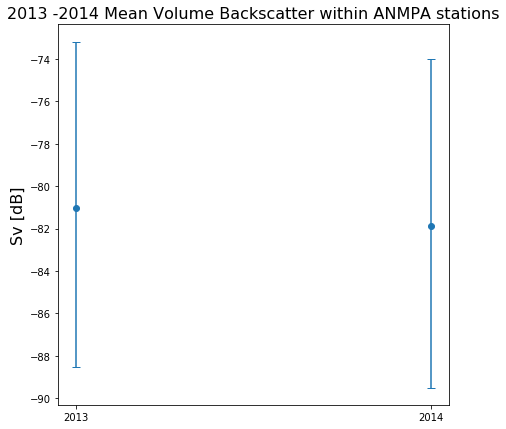

In [43]:
fig, axs = plt.subplots(figsize=(7,7))
axs.errorbar([0,1], [mean13,mean14], yerr=[[minstd13, minstd14],[maxstd13, maxstd14]], capsize = 4, fmt='o')
axs.xaxis.set_ticks([0,1])
axs.set_xticklabels(['2013','2014'])
plt.title('2013 -2014 Mean Volume Backscatter within ANMPA stations', fontsize='16')
plt.ylabel('Sv [dB]', fontsize='16')

## Map the selected data

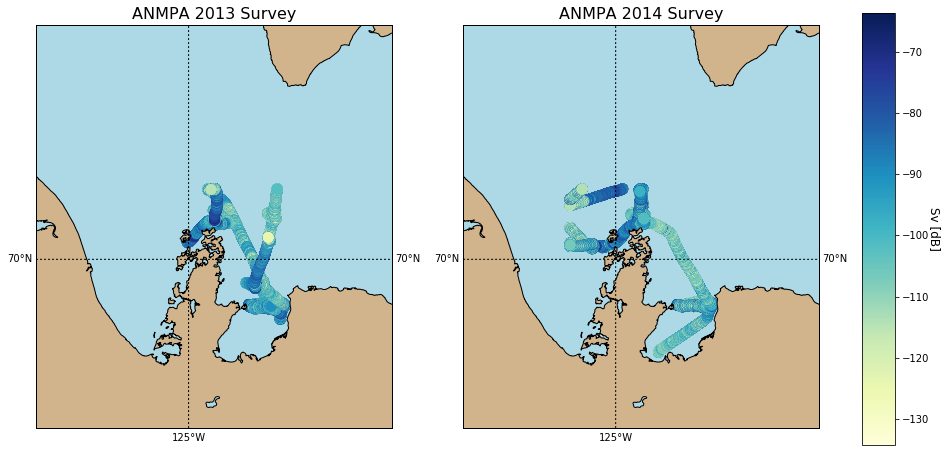

In [44]:
# Plot 2013
fig, axes = plt.subplots(1,2,figsize=(15,15))
plt.subplot(121)
m = Basemap(projection='merc',llcrnrlat=min_lat-0.5,urcrnrlat=max_lat+1,llcrnrlon=min_long-2,urcrnrlon=max_long+2,resolution='f')
m.drawcoastlines()
m.fillcontinents(color='tan',lake_color='lightblue')
m.drawparallels(np.arange(-90.,91.,5.),labels=[True,True,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-180.,181.,5.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary(fill_color='lightblue')
x_2013, y_2013 = m(longs_2013, lats_2013) 
plt.title('ANMPA 2013 Survey', fontsize=16)
im=plt.scatter(x_2013, y_2013,c=Sv_2013, s=10**2, cmap=plt.cm.YlGnBu, marker='o', facecolors='None')

#Plot 2014
plt.subplot(122)
m = Basemap(projection='merc',llcrnrlat=min_lat-0.5,urcrnrlat=max_lat+1,llcrnrlon=min_long-2,urcrnrlon=max_long+2,resolution='f')
m.drawcoastlines()
m.fillcontinents(color='tan',lake_color='lightblue')
m.drawparallels(np.arange(-90.,91.,5.),labels=[True,True,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-180.,181.,5.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary(fill_color='lightblue')
x_2014, y_2014 = m(longs_2014, lats_2014)
plt.title('ANMPA 2014 Survey', fontsize=16)
im = plt.scatter(x_2014, y_2014, c=Sv_2014, s=10**2, cmap=plt.cm.YlGnBu, marker='o')



fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.89, 0.3, 0.03, 0.4])
cbar = fig.colorbar(im, cax=cbar_ax)

cbar.set_label('Sv [dB]', rotation=270, fontsize=12, labelpad=12)